# Final examn

Find the Linear and quadratic approximation to the function  $f(x, y) = e^{x^2 + y}$ in a neighbourhood of $(x, y) = (0, 0)$. You can make use of sympy for all purposes.

- Plot the function and the linear and quadratic approximation.
- Plot the contour lines of the function.
- Plot the expansion point.

Using the function in the item 1, optimize it, using:

- Gradient descendent method
- Newton method
- Plot the contour lines and use several initial points to find the 
minimum.
- Draw the descendent steps from the initial point until the critical 
point.itical 
point.

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pylab as plt

In [2]:
f = sp.parse_expr("exp(x**2 + y)")
f

exp(x**2 + y)

In [3]:
# Get the variables
x = sp.Matrix(sorted(list(f.free_symbols),key=str)).T
x

Matrix([[x, y]])

In [4]:
# Read the expasion poitn
x0 = sp.Matrix([0, 0]).T
x0

Matrix([[0, 0]])

In [5]:
f0 = f.subs(dict(zip(x, x0))).evalf()
f0

1.00000000000000

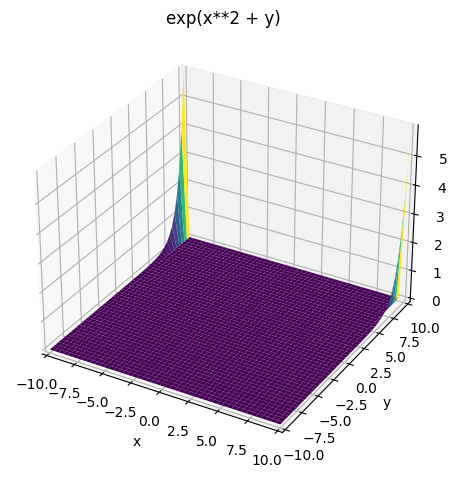

In [6]:
plot = sp.plotting.plot3d(f, title=f, xlabel="x", ylabel="y", zlabel="z")

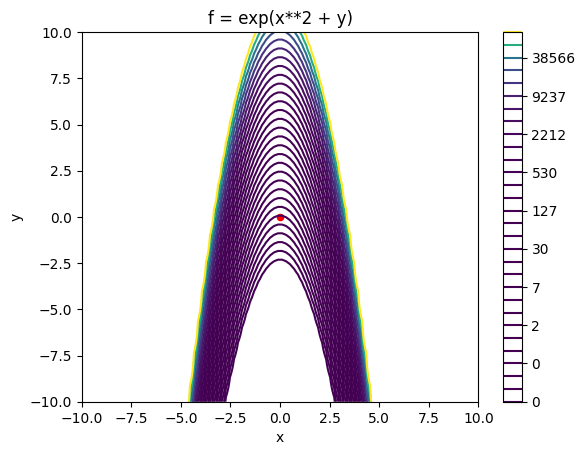

In [7]:
X, Y = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
Zf = sp.lambdify((x[0], x[1]), f, 'numpy')(X, Y)
plt.contour(X,Y,Zf,levels=np.logspace(-1, 5, 30))
plt.colorbar()
plt.scatter(x0[0], x0[1], color="r", s=20)
plt.xlabel('x')
plt.ylabel('y')
plt.title("f = " + str(f))
plt.show();

## Linear Taylor

In [8]:
gradient = sp.Matrix([f.diff(xi) for xi in x])
gradient

Matrix([
[2*x*exp(x**2 + y)],
[    exp(x**2 + y)]])

In [9]:
g0 = gradient.subs(dict(zip(x, x0)))
L = f0 + g0.dot(x - x0)
L

y + 1.0

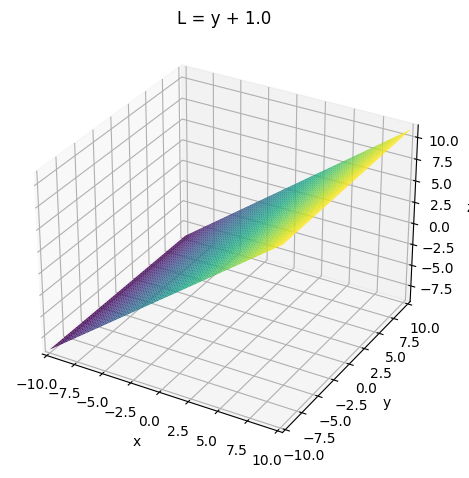

In [10]:
title = "L = " + str(L)
sp.plotting.plot3d(L, title=title, xlabel="x", ylabel="y", zlabel="z");

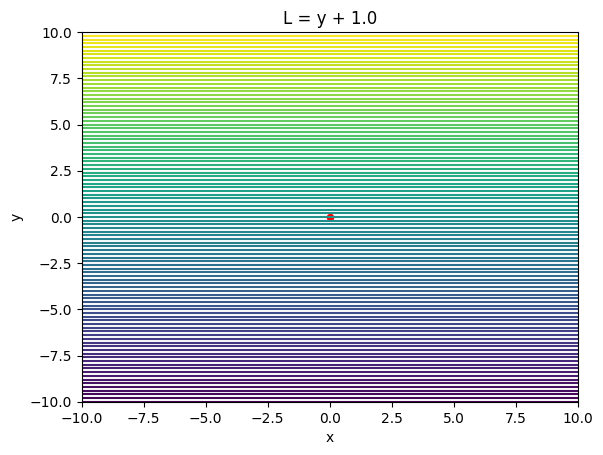

In [11]:
ZL = sp.lambdify((x[0], x[1]), L, 'numpy')(X, Y)
plt.contour(X,Y,ZL,100)
plt.scatter(x0[0], x0[1], color="r", s=20)
plt.xlabel('x')
plt.ylabel('y')
plt.title("L = " + str(L))
plt.show();

## Quadratic Taylor

In [12]:
hessian = sp.Matrix([[f.diff(xi).diff(xj) for xi in x] for xj in x])
hessian

Matrix([
[4*x**2*exp(x**2 + y) + 2*exp(x**2 + y), 2*x*exp(x**2 + y)],
[                     2*x*exp(x**2 + y),     exp(x**2 + y)]])

In [13]:
h0 = hessian.subs(dict(zip(x, x0)))
h0

Matrix([
[2, 0],
[0, 1]])

In [14]:
Q = L + (1/2)*((x-x0)*h0).dot((x-x0).T)
Q

1.0*x**2 + 0.5*y**2 + y + 1.0

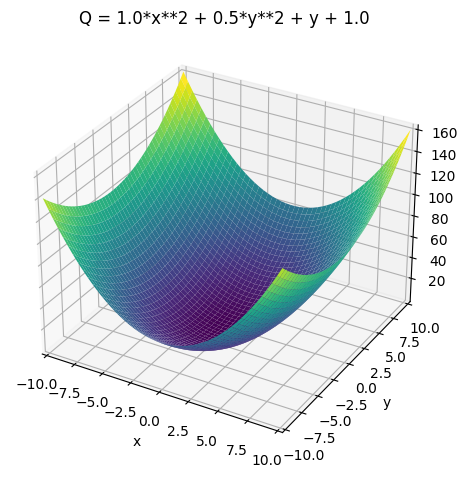

In [15]:
sp.plotting.plot3d(Q, title="Q = " + str(Q), xlabel="x", ylabel="y", zlabel="z");

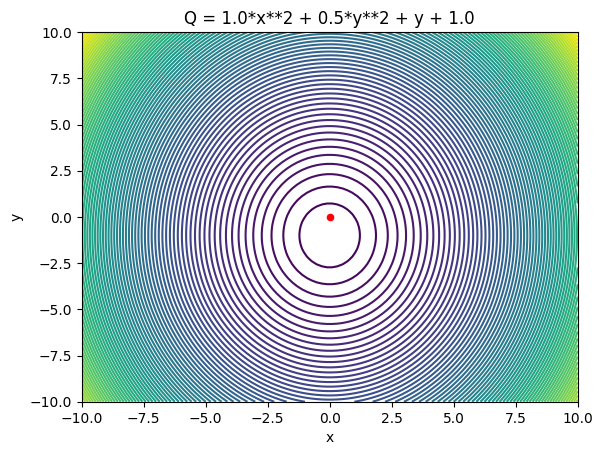

In [16]:
ZQ = sp.lambdify((x[0], x[1]), Q, 'numpy')(X, Y)
plt.contour(X,Y,ZQ,100)
plt.scatter(x0[0], x0[1], color="r", s=20)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Q = " + str(Q))
plt.show();

## Gradient descendent method

In [42]:
points = [sp.Matrix([0, 0]).T, sp.Matrix([0, 2]).T]
points

[Matrix([[0, 0]]), Matrix([[0, 2]])]

In [ ]:
alpha = 10**(-3)
max_iter = 100
tolerance = 10**(-4)

def gradient_method(x0):
    xk = x0
    for i in range(max_iter):
        gradient_fk = gradient.subs(dict(zip(x, xk)))
        delta = alpha * gradient_fk.T
        xk = xk - delta
        plt.scatter(xk[0], xk[1], color="g", s=5)
        
        if abs(delta[0]) < tolerance and abs(delta[1]) < tolerance: 
                print(f"break at {i}")
                break
    return xk

p = sp.Matrix([0]).T
plt.figure()
plt.contour(X,Y,Zf,levels=np.logspace(-1, 5, 30))
plt.colorbar()

res = gradient_method(p)
plt.scatter(res[0], res[1], color="r", s=50)

plt.xlabel('x')
plt.ylabel('y')
# plt.title("gradient_method(" + str(p[0]) + ", " + str(p[1]) + ") = (" + str(res[0]) + ", " + str(res[1]))
plt.show();

## Newton method

In [ ]:
tolerance = 10**(-4)
alpha = 0.1
max_iter = 100

def newton_method(x0):
    xk = x0
    for i in range(max_iter):
        gradient_fk = gradient.subs(dict(zip(x, xk)))
        hessian_fk = hessian.pinv().subs(list(zip(x, xk)))
        delta = alpha*(hessian_fk * (gradient_fk)).T
        xk = xk - delta 
        
        if abs(delta[0]) < tolerance and abs(delta[1]) < tolerance: 
            print(f"break at {i}")
            break
        
        plt.scatter(xk[0], xk[1], color="g", s=5)
    return xk

p = sp.Matrix([0, 0]).T
plt.contour(X,Y,Zf,levels=np.logspace(-1, 5, 30))
plt.colorbar()

res = newton_method(p)
plt.scatter(res[0], res[1], color="r", s=50)

plt.xlabel('x')
plt.ylabel('y')
plt.title("newton_method(" + str(p[0]) + ", " + str(p[1]) + ") = (" + str(res[0]) + ", " + str(res[1]))
plt.show();